In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-03-24 15:00:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2020-03-24 15:00:10 (2.78 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


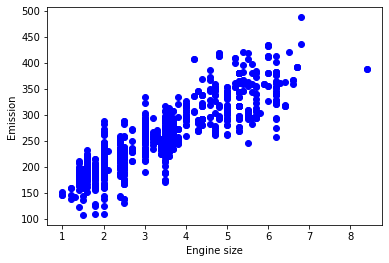

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [13]:
clf = linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly, train_y)

print('Coefficient: ', clf.coef_)
print('Intercepy: ', clf.intercept_)

Coefficient:  [[ 0.         45.73575275 -0.88139908]]
Intercepy:  [114.41896525]


Text(0, 0.5, 'Emission')

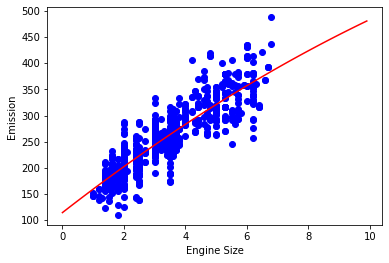

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+clf.coef_[0][1]*XX+clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [17]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_= clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.29
Residual sum of squares (MSE): 1036.79
R2-score: 0.68


Mean absolute error: 24.16
Residual sum of squares (MSE): 1022.90
R2-score: 0.68


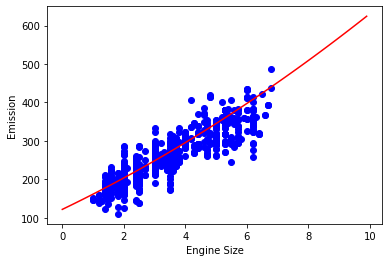

In [23]:
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly, train_y)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+clf.coef_[0][1]*XX+clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

test_x_poly = poly.fit_transform(test_x)
test_y_= clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )